# CAGE_Population
Logistic fit to increase in global population over its 
1820 value.

Set the working directory and import necessary libraries

In [1]:
# %reset -f  # clear all variables
import os
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17Population') # change 
# directory
import pandas as pd   # include pandas library
import numpy as np    # include numpy library
import matplotlib.pyplot as plt  # include the matplotlib library
from scipy.optimize import curve_fit  # include scipy
# libary, the curve_fit function use non-linear least 
#squares to fit a function, f, to data

Input the data, and select what will be used.

In [2]:
df = pd.read_excel('cage18jun05pop1820-2100un.xlsx') 
yrs = df.iloc[:,0:1] # assign the values of year from 1820 to 2100
poptot = df.iloc[:,1:2]  # assign total population to poptot
poptot = poptot['Total Population(1000s)'].tolist()
poptot = list(map(float, poptot))
newpoptot = [x / 1000000 for x in poptot]  # change the total 
# population's unit to billion
poptot = list(map(str, newpoptot))
poptot = pd.DataFrame({'Total Population(billions)':poptot})
df = pd.merge(yrs, poptot, left_index =True, right_index =True,
              how='outer') # merge the two "yrs" and "poptot"  
#  dataframe to one dataframe called "df"
poptot1 = df.iloc[0,1] # assign the total population of 1820 to poptot1
poptot1 = float(poptot1)
yrs = yrs['Years'].tolist()
ydata = df.iloc[:,1].tolist()
ydata = list(map(float, ydata))
yrs = list(map(int, yrs))

Define the logistic function

In [3]:
def logistic(yrs, b1, b2, b3):
     y = b1 / (1 + np.exp(-(yrs-b2)/b3))+poptot1 
     return y

$\frac{b1}{1+e^{-(yrs-b2)/b3}}+poptot1$



Fit the historical data to a constant plus logistic function by using non-linear least square method

In [4]:
param_bounds=([0,2000,30],[15,2200,35]) # set the parameter
# searching bound 
# for b1 as (0,15) and b2 as (2000,2200) and b3 as (0,0.1)
popt,pcov = curve_fit(logistic, yrs, ydata, 
 bounds=param_bounds) # popt is the optimal values for the
# parameters so that the sum of the squared residuals 
# of is minimized

Plot the fitted logistic function and save the results as a csv file

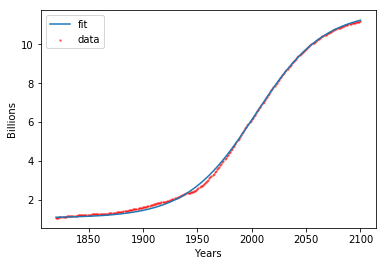

In [5]:
# valuesList = ["", "Values"]
# for i in range(0,len(popt)):
#     valuesList.append(popt[i])

# valuesList = ["", "Values"]
# valuesList = []
# for i in range(0,len(popt)):
#     valuesList.append(popt[i])
# print (len(valuesList))
# print (valuesList)

# x = np.array(yrs)
# y = logistic(x, *popt)
# b1b2b3param = pd.DataFrame({'Name':['b1', 'b2', 'b3'],
#      'Values':valuesList,'Units':['Year','Julian Year','1/Year'],
#      'Meaning':['Saturation value','Inflection time','Initial growth rate']}, 
#     columns=["Name", "Values", "Units", "Meaning"])
# b1b2b3param.loc[-1]=['Fitted parameters of Population logistic function',
#                      '','','']
# b1b2b3param.index = b1b2b3param.index+1
# b1b2b3param = b1b2b3param.sort_index()
# b1b2b3param.loc[(len(b1b2b3param))] = ['2018/06/11','heat18pop11jun.nb'
#                                        ,'','']
x = np.array(yrs)
y = logistic(x, *popt)
b1b2b3param = pd.DataFrame({'Fitted parameters':['b1', 'b2', 'b3'],
     'of Population':popt,'logistic':['Year','Julian Year','1/Year'],
     'function':['Saturation value','Inflection time','Initial growth rate']}, 
    columns=["Fitted parameters", "of Population", "logistic", "function"])

# b1b2b3param = pd.DataFrame({'Fitted parameters of Population logistic function':['b1', 'b2', 'b3'],
#      ' ':popt,' ':['Year','Julian Year','1/Year'],
#      ' ':['Saturation value','Inflection time','Initial growth rate']}, 
#     columns=["Fitted parameters of Population logistic function", " ", " ", " "])

b1b2b3param.loc[-1]=['Name',
                     'Values','Units','Meaning']
b1b2b3param.index = b1b2b3param.index+1
b1b2b3param = b1b2b3param.sort_index()
b1b2b3param.loc[(len(b1b2b3param))] = ['2018/06/11','heat18pop11jun.nb'
                                       ,'','']

b1b2b3param.to_csv('CAGE_Pop_Parameters.csv', index=False)
plt.scatter(yrs, ydata, s=2,c='r',alpha = 0.5, label="data",marker='o')
plt.plot(yrs,y, label='fit')
plt.xlabel('Years')
plt.ylabel('Billions')
plt.legend(loc='best')
plt.savefig('pop.eps',dpi=1000)
plt.show()